In [1]:
import pandas as pd
from data_preprocessing import preprocess_data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_data = "data/accepted_2007_to_2018Q4.csv.gz"
unemployment_rate_data = ["data/unemployment_rate_0.csv", "data/unemployment_rate_1.csv", "data/unemployment_rate_2.csv", "data/unemployment_rate_3.csv", "data/unemployment_rate_4.csv"]

data = preprocess_data(loan_data, unemployment_rate_data)

Loan data loaded successfully.
Unemployment rate data loaded and merged successfully.
Loan and unemployment data merged successfully.
Data preprocessing completed successfully.


In [3]:
X = data.copy()
y = X.pop('default')

In [4]:
X_scaled = StandardScaler().fit_transform(X)

In [5]:
imputer = SimpleImputer(strategy='median')
X_scaled = imputer.fit_transform(X_scaled)

## PCA

In [6]:
# Number of components
n = 20
pca = PCA(n_components=n)

# Fit and transform
X_pca = pca.fit_transform(X_scaled)

In [ ]:
loading_strength = np.abs(pca.components_[0])  # first PC
top_features = np.argsort(loading_strength)[::-1][:10]  # top 10 features
print("Top 10 features contributing to the first principal component:")
print(data.columns[top_features])

Top 10 features contributing to the first principal component:
Index(['open_acc', 'num_sats', 'num_op_rev_tl', 'total_acc', 'num_bc_sats',
       'num_rev_accts', 'total_bc_limit', 'total_rev_hi_lim',
       'funded_amnt_inv', 'funded_amnt'],
      dtype='object')


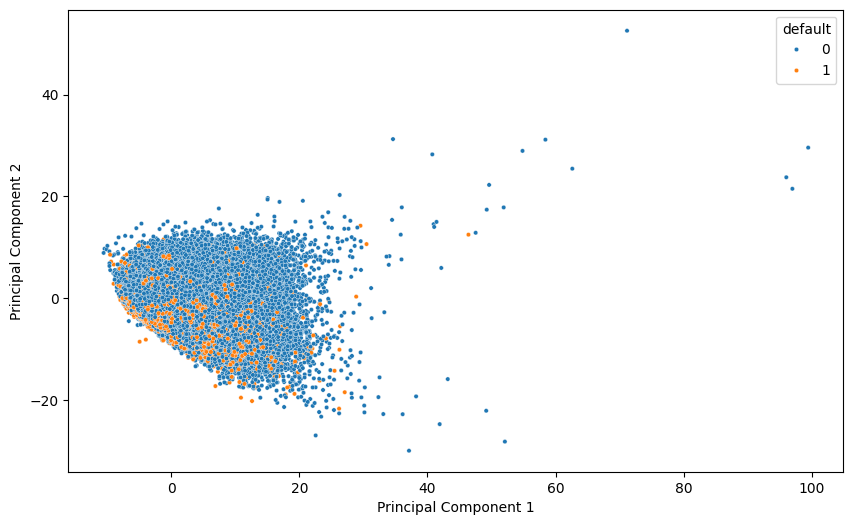

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, s=10)

#plt.legend(labels=['No Default', 'Default'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show();

## K-Means Clustering

In [9]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, n_init='auto', random_state=0)
labels = km.fit_predict(X_pca)

In [10]:
# Add cluster labels to the original data
data['cluster'] = labels

In [19]:
data.groupby('cluster')['default'].mean()

cluster
0    0.231359
1    0.083857
2    0.034653
3    0.105079
4    0.163029
Name: default, dtype: float64

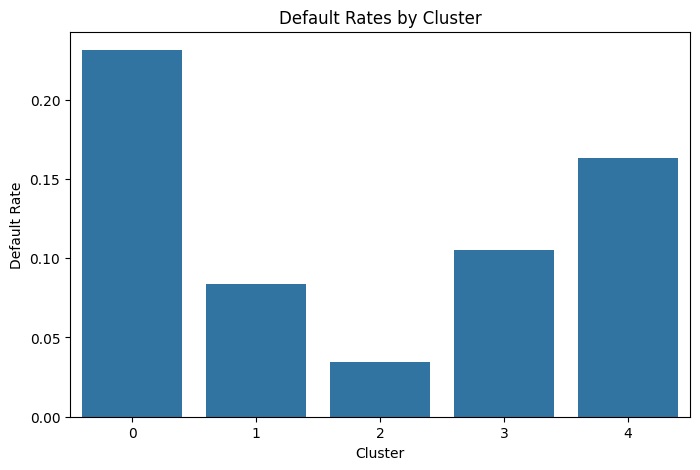

In [20]:
# Bar chart of cluster default rates
plt.figure(figsize=(8, 5))
sns.barplot(x=data.groupby('cluster')['default'].mean().index, y=data.groupby('cluster')['default'].mean().values)
plt.xlabel('Cluster')
plt.ylabel('Default Rate')
plt.title('Default Rates by Cluster')
plt.show()

In [21]:
dict_clusters = {
    2: 'Very low risk',
    1: 'Low risk',
    3: 'Medium risk',
    4: 'High risk',
    0: 'Very high risk'
}

In [25]:
data['clusters_risk'] = data['cluster'].map(dict_clusters)

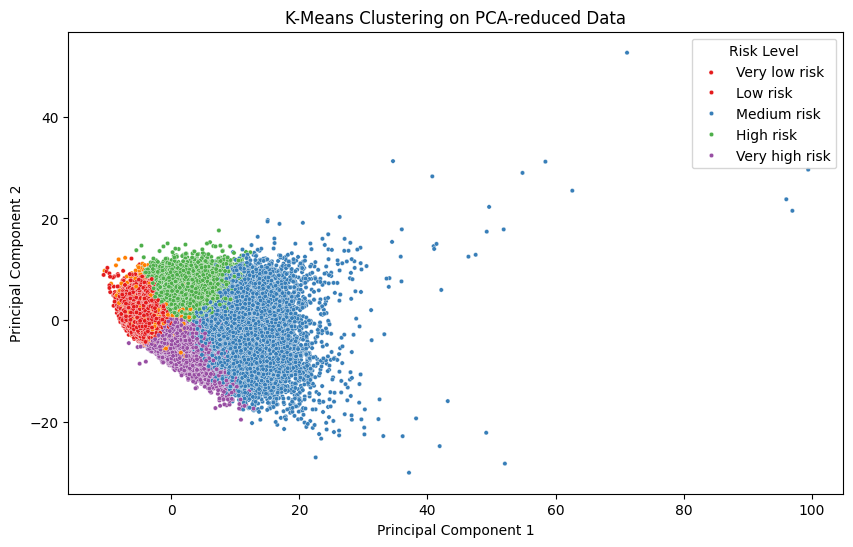

In [36]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['clusters_risk'], palette='Set1', s=10)

plt.title('K-Means Clustering on PCA-reduced Data')
plt.legend(title='Risk Level', labels=[dict_clusters[i] for i in [2, 1, 3, 4, 0]])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show();

In [ ]:
# Analyze which features differ most across clusters
cluster_means = data.groupby('cluster').mean(numeric_only=True)
diff = cluster_means.max() - cluster_means.min()
top_diff = diff.sort_values(ascending=False).head(10)
print(top_diff)

tot_hi_cred_lim               301174.363355
tot_cur_bal                   229623.875998
total_rev_hi_lim               82010.296464
annual_inc                     75528.757808
total_bal_ex_mort              73842.299632
total_bc_limit                 54395.823617
total_il_high_credit_limit     48482.342933
total_bal_il                   41191.015810
revol_bal                      35859.603171
bc_open_to_buy                 32224.994989
dtype: float64


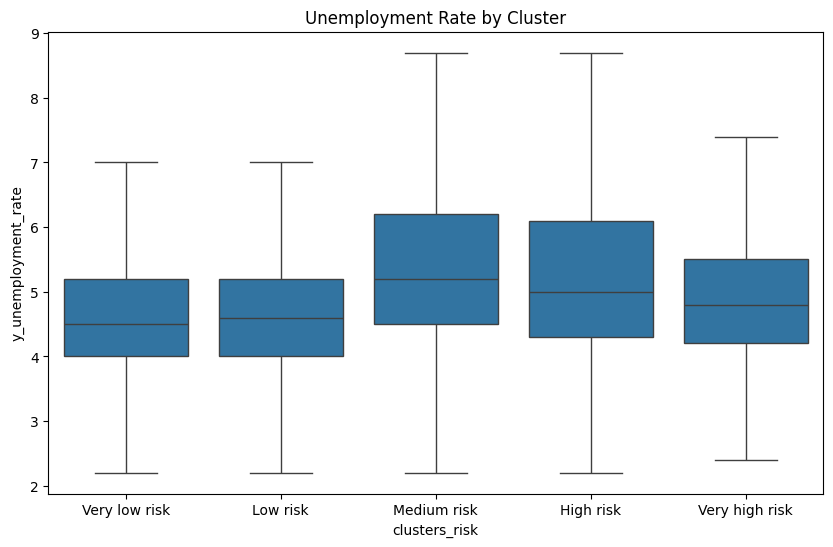

In [33]:
order = ['Very low risk', 'Low risk', 'Medium risk', 'High risk', 'Very high risk']

plt.figure(figsize=(10, 6))

sns.boxplot(x='clusters_risk', y='y_unemployment_rate', data=data, showfliers=False, order=order)

plt.title('Unemployment Rate by Cluster')
plt.show();

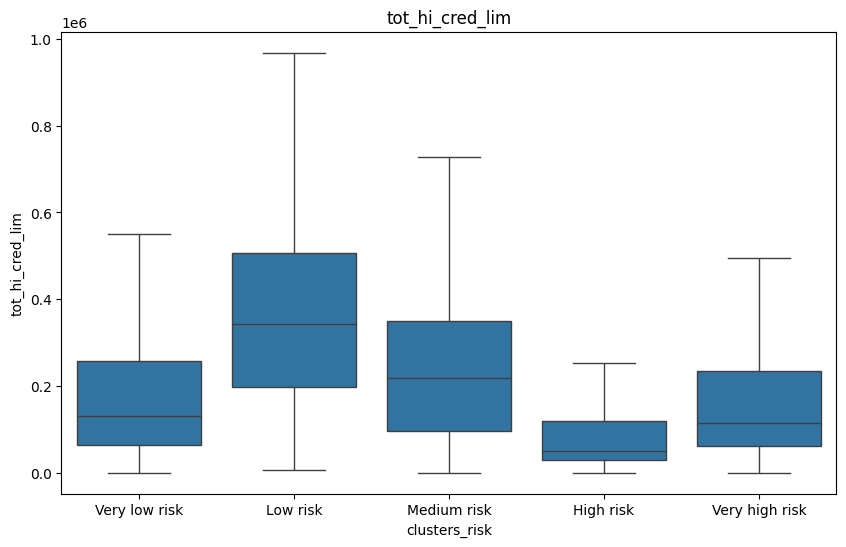

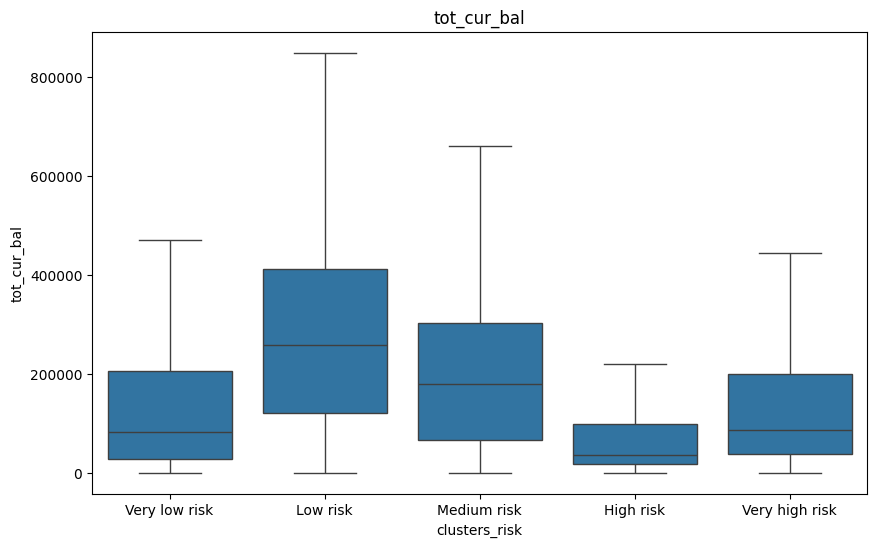

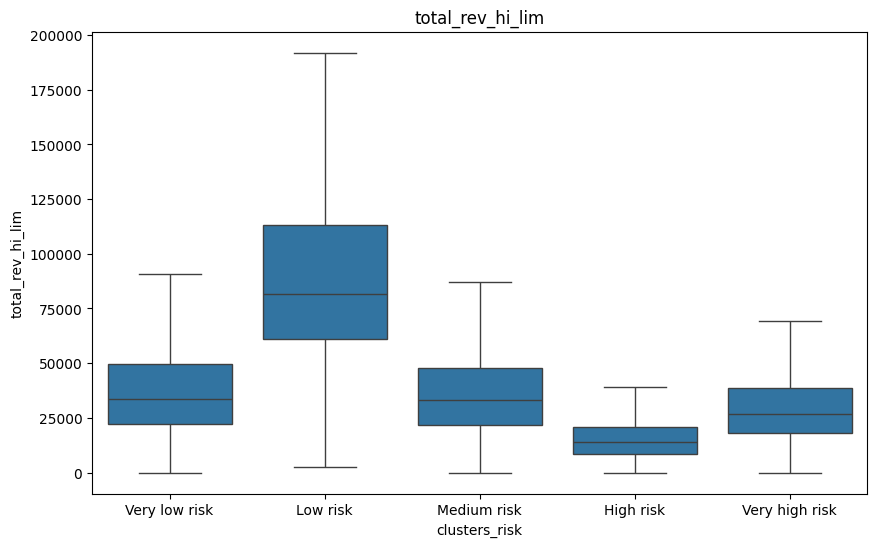

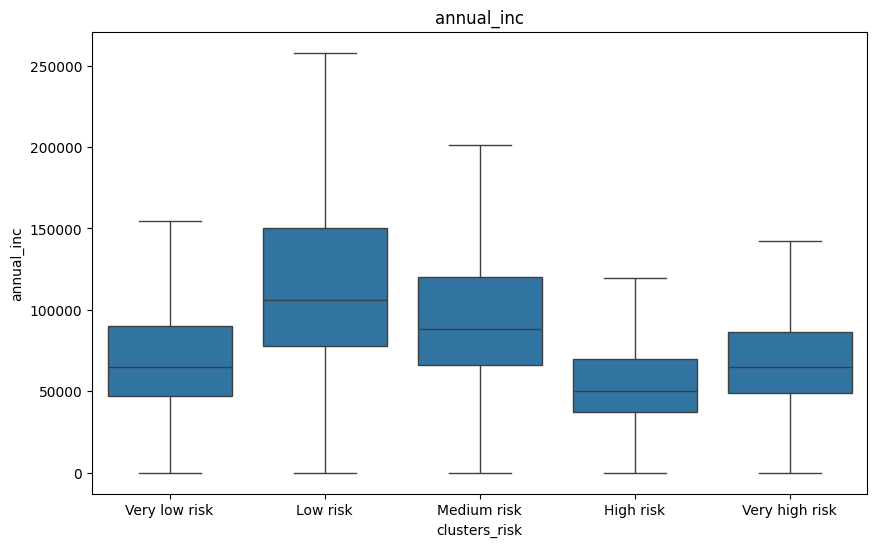

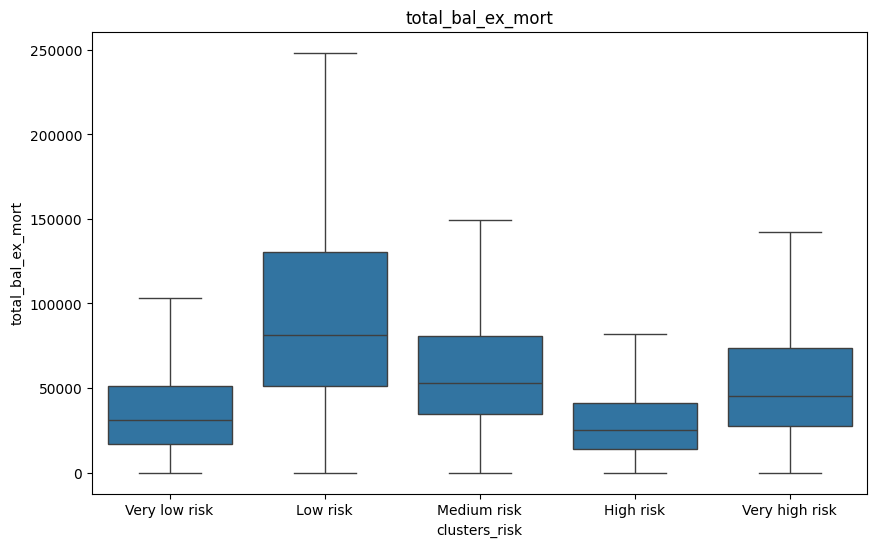

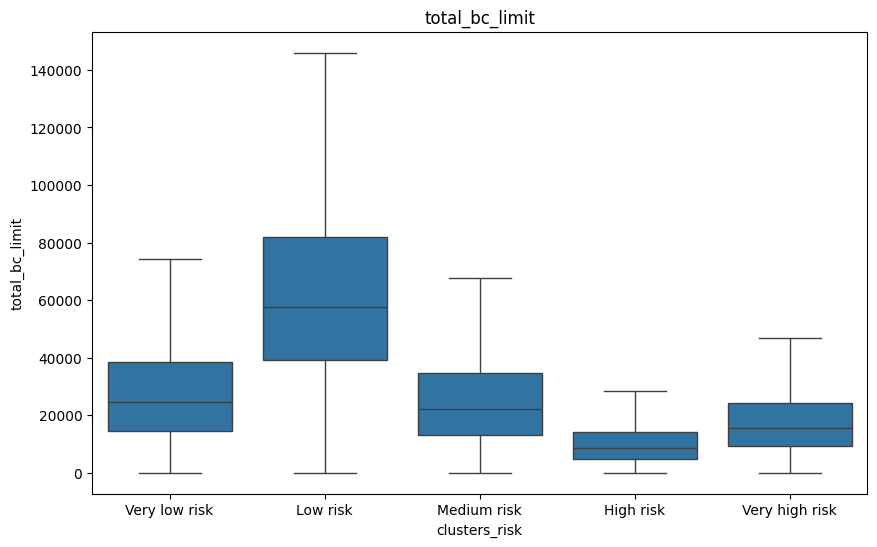

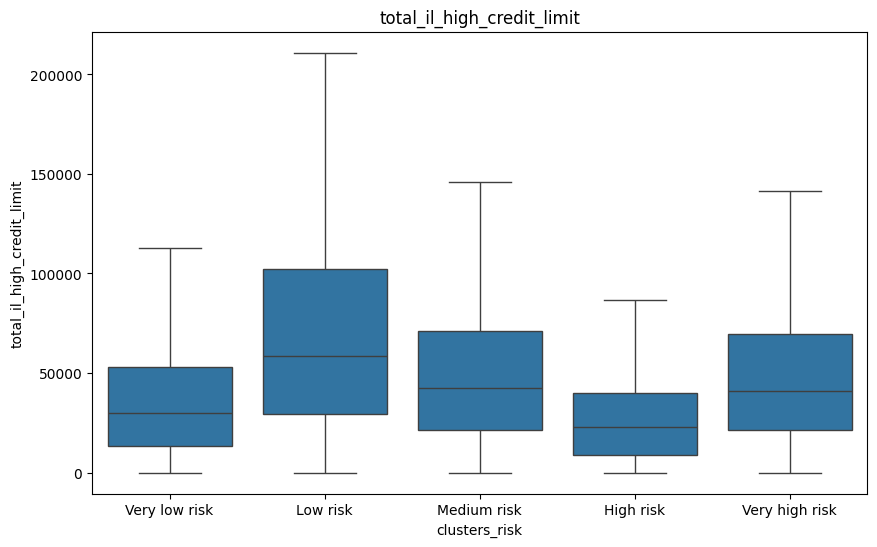

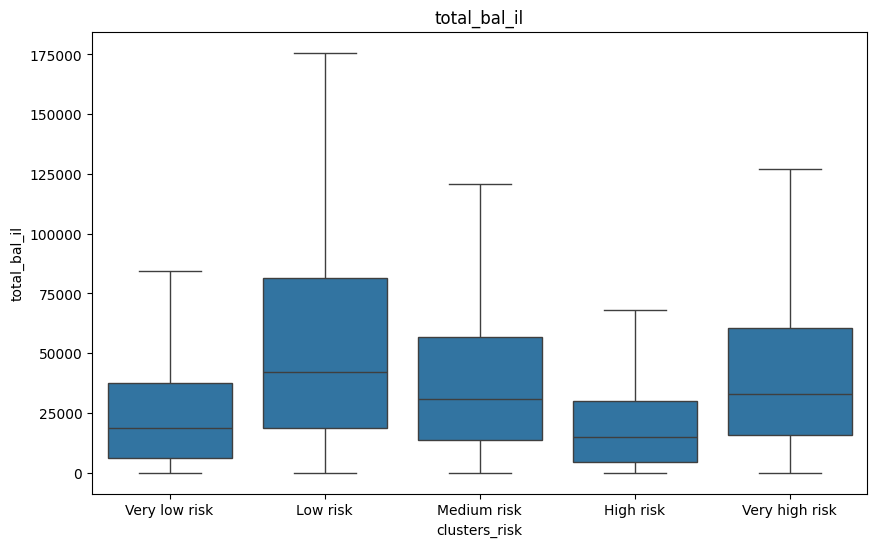

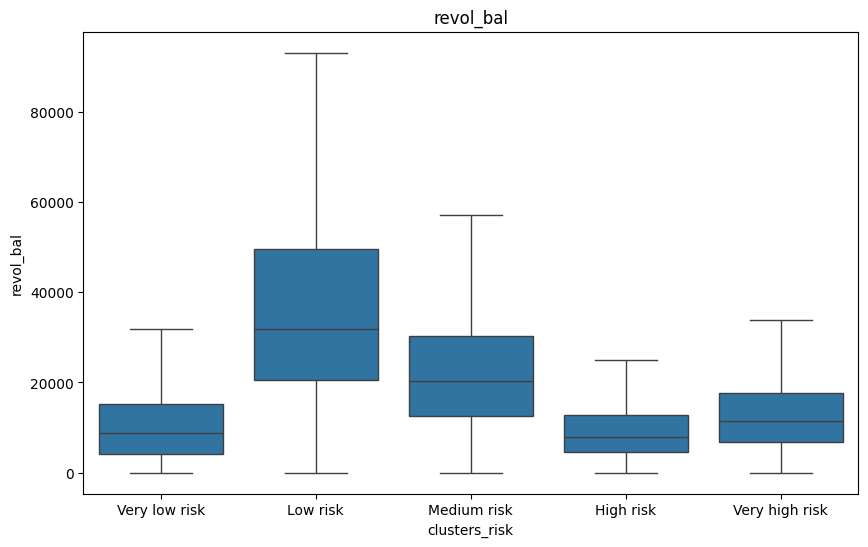

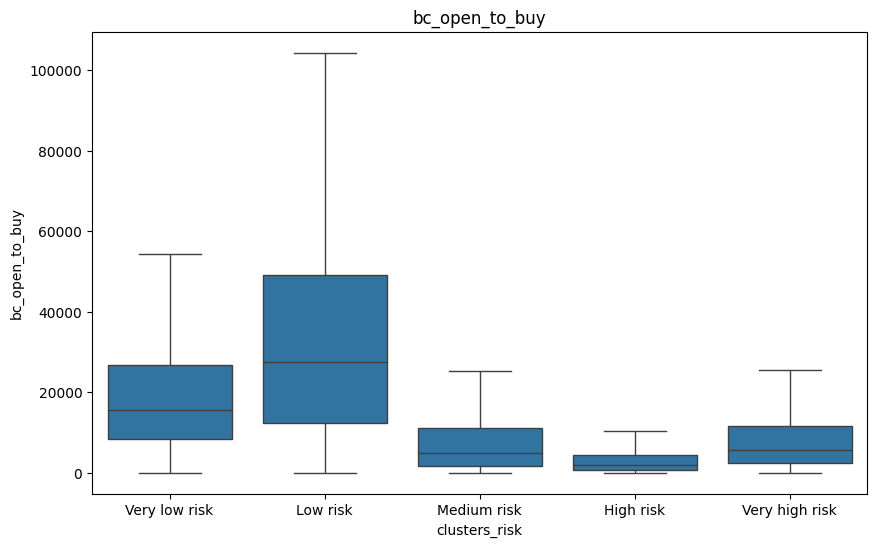

In [ ]:
order = ['Very low risk', 'Low risk', 'Medium risk', 'High risk', 'Very high risk']

# Box plots for top differing features
for col in top_diff.index:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='clusters_risk', y=col, data=data, showfliers=False, order=order)
    plt.title(col)
    plt.show()

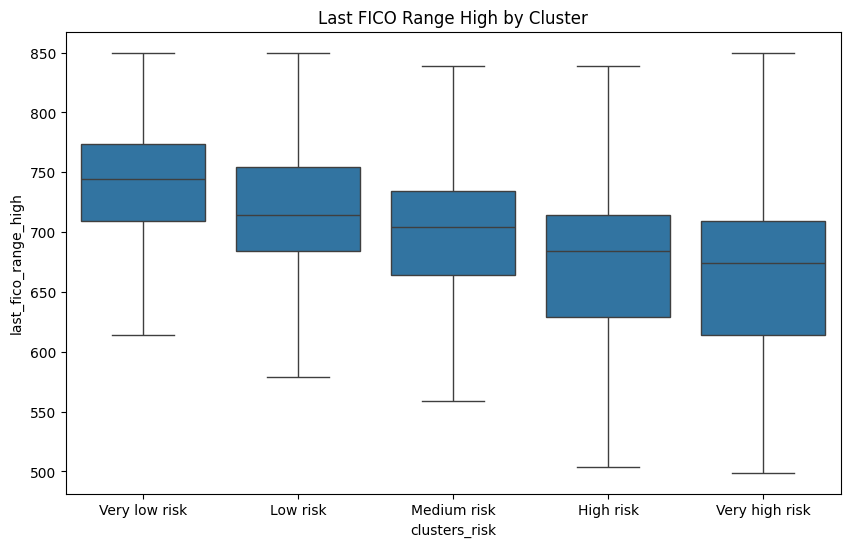

In [42]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='clusters_risk', y='last_fico_range_high', data=data, showfliers=False, order=order)

plt.title('Last FICO Range High by Cluster')
plt.show();

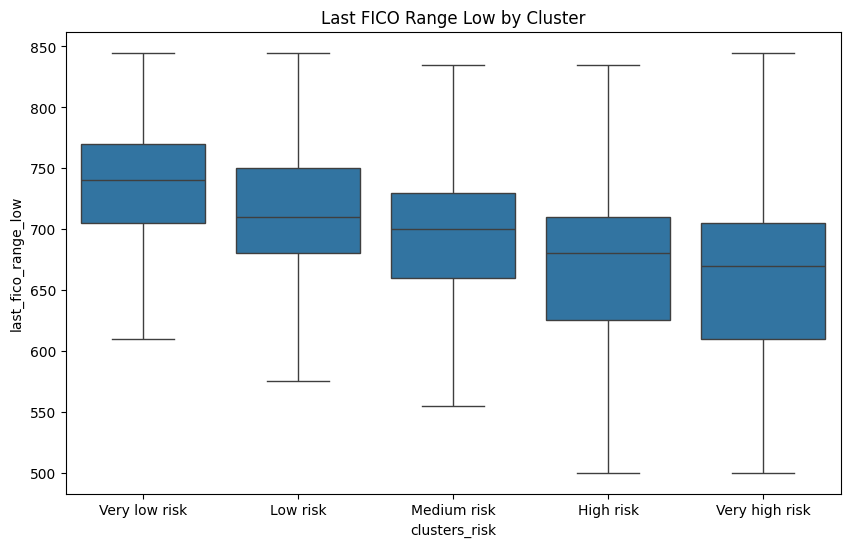

In [45]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='clusters_risk', y='last_fico_range_low', data=data, showfliers=False, order=order)

plt.title('Last FICO Range Low by Cluster')
plt.show();

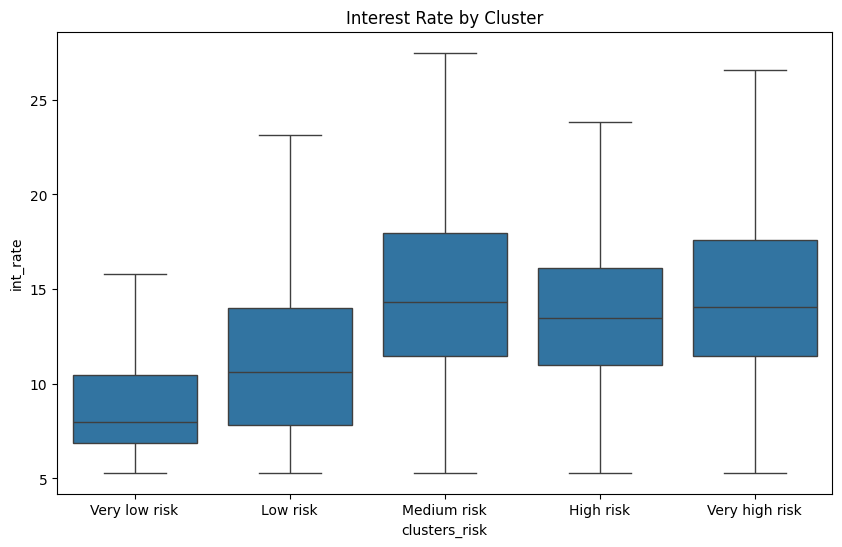

In [48]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='clusters_risk', y='int_rate', data=data, showfliers=False, order=order)

plt.title('Interest Rate by Cluster')
plt.show();

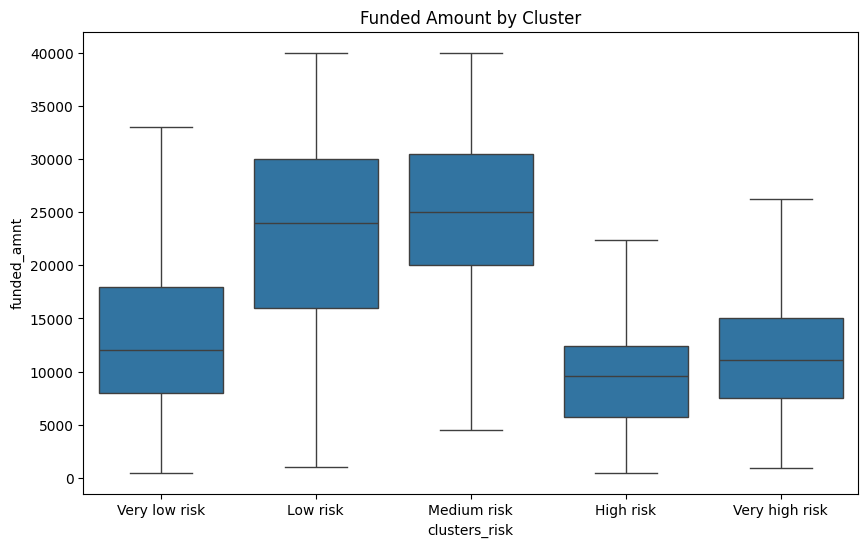

In [49]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='clusters_risk', y='funded_amnt', data=data, showfliers=False, order=order)

plt.title('Funded Amount by Cluster')
plt.show();